# Movie Profit EDA — Portfolio Version

This notebook demonstrates end‑to‑end exploratory data analysis (EDA): loading data, cleaning (duplicates, missing values),
feature engineering (profit & ROI), visualisation, and takeaways. The focus is clarity and reproducibility.


## Setup
Import libraries used for data manipulation and visualisation.

In [109]:
# Used to analyse data
import pandas as pd
# Used to create plots for presentation
import matplotlib.pyplot as plt

## Load data
Read the CSV into a DataFrame.

In [110]:
data = pd.read_csv("movie_profit.csv")

### Peek at the data
A quick glance at the first few rows.

In [111]:
# Check the first x amount of rows (defaults to 5)
data.head()

,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre
0,1,6/22/2007,Evan Almighty,175000000.0,100289690.0,1.741313e+08,Universal,PG,Comedy
1,2,7/28/1995,Waterworld,175000000.0,88246220.0,2.642462e+08,Universal,PG-13,Action
2,3,5/12/2017,King Arthur: Legend of the Sword,175000000.0,39175066.0,1.399507e+08,Warner Bros.,PG-13,Adventure
3,4,12/25/2013,47 Ronin,175000000.0,38362475.0,1.517168e+08,Universal,PG-13,Action
4,5,6/22/2018,Jurassic World: Fallen Kingdom,170000000.0,416769345.0,1.304866e+09,Universal,PG-13,Action


## Columns and initial pruning
Check columns and drop obvious noise columns if needed.

In [112]:
# Checking the colums to see if theres anything that shouild be excluded
data.columns

Index(['Unnamed: 0', 'release_date', 'movie', 'production_budget',
       'domestic_gross', 'worldwide_gross', 'distributor', 'mpaa_rating',
       'genre'],
      dtype='object')

In [113]:
# Removing unwanted colums and keeping it inplace so it applies to our data instead of something new
data.drop(columns= ('Unnamed: 0'), inplace = True)

## Dataset info
Review dtypes and non‑null counts to plan cleaning steps.

In [114]:
# Gathering information on the dataset to decide what to alter next
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401 entries, 0 to 3400
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       3401 non-null   object 
 1   movie              3401 non-null   object 
 2   production_budget  3401 non-null   float64
 3   domestic_gross     3401 non-null   float64
 4   worldwide_gross    3401 non-null   float64
 5   distributor        3353 non-null   object 
 6   mpaa_rating        3264 non-null   object 
 7   genre              3401 non-null   object 
dtypes: float64(3), object(5)
memory usage: 212.7+ KB


# Type changing

Converting different colums into more appropriate types

In [115]:
# Converting release_date to datetime
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')

# Converting genre/distributor into categories
data['genre'] = data['genre'].astype('category')
data['distributor'] = data['distributor'].astype('category')

In [116]:
# Check how many release_date values failed to convert (became NaT - Not a Time)
nat_count = data['release_date'].isna().sum()
total = len(data)

print(f"NaT values: {nat_count} out of {total} rows "
      f"({nat_count/total:.2%} of the dataset)")


NaT values: 0 out of 3401 rows (0.00% of the dataset)


## Duplicates
Identify and remove duplicate movie entries.

In [117]:
# Checking for duplicates
data.duplicated(subset=['movie']).sum()

np.int64(1)

In [118]:
# Remove duplicates. Note that keeping the first instance is the default
data.drop_duplicates(subset=['movie'], keep='first', inplace=True)

## Missing values
Explore where values are missing to inform any drops or imputations.

In [119]:
# Checking for null values (isna() does the same thing as isnull())
data.isnull().sum()

release_date           0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
distributor           47
mpaa_rating          137
genre                  0
dtype: int64

In [120]:
# Rows with null values in 'distributor' (47) and 'mpaa_rating' (137) are being removed here for convenience.
# While this simplifies the dataset, it does have drawbacks:
#   - We lose ~185 movies (~5% of the dataset), which reduces sample size.
#   - Missingness might not be random (e.g. smaller studios or unrated films),
#     so deleting them could bias the analysis.
# A safer approach could be to fill nulls with placeholders 
# such as 'Unknown' or 'Unrated'
# to retain all data while still handling missing values.
data.dropna(inplace=True)

In [121]:
# A statistic summary that I can use to identify anomalies
data.describe()

,release_date,production_budget,domestic_gross,worldwide_gross
count,3230,3.230000e+03,3.230000e+03,3.230000e+03
mean,2004-12-31 21:50:15.975232128,3.459218e+07,4.726805e+07,9.841706e+07
min,1936-02-05 00:00:00,2.500000e+05,0.000000e+00,0.000000e+00
25%,2000-03-01 12:00:00,1.000000e+07,6.867944e+06,1.177994e+07
50%,2006-02-17 00:00:00,2.200000e+07,2.733297e+07,4.404424e+07
75%,2011-09-16 00:00:00,4.900000e+07,6.341329e+07,1.252019e+08
max,2019-03-15 00:00:00,1.750000e+08,4.745447e+08,1.304866e+09
std,NaN,3.526337e+07,5.973707e+07,1.432841e+08


In [122]:
# Given that the min of domestic gross and worldwide gross were both suspicously 0, we can further explore the details of it

# print((data['domestic_gross'] == 0).sum())
# print((data['worldwide_gross'] == 0).sum())

(data[['domestic_gross', 'worldwide_gross']] == 0).sum()


domestic_gross     51
worldwide_gross    28
dtype: int64

In [123]:
# Getting a better look at the data.
# Given that these movies do infact have domestic grosses I am assuming missing data was substituted by a 0 value
# This information is available through a normal web search

data[data['domestic_gross'] == 0].head(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre
30,2018-12-21,Aquaman,160000000.0,0.0,0.0,Warner Bros.,PG-13,Action
228,2019-03-15,Wonder Park,100000000.0,0.0,0.0,Paramount Pictures,PG,Adventure
1030,2016-11-11,USS Indianapolis: Men of Courage,40000000.0,0.0,1641255.0,Saban Films,R,Drama
1088,2017-04-14,Queen of the Desert,36000000.0,0.0,1578543.0,IFC Films,PG-13,Drama
1183,2015-03-13,The Lovers,35000000.0,0.0,11106.0,IFC Films,PG-13,Adventure
1445,2015-03-17,Accidental Love,26000000.0,0.0,135436.0,Alchemy,PG-13,Comedy
1566,2011-07-08,Ironclad,25000000.0,0.0,5297411.0,ARC Entertainment,R,Action
1825,2004-03-31,The Touch,20000000.0,0.0,5918742.0,Miramax,PG-13,Adventure
1917,2016-04-15,I Am Wrath,18000000.0,0.0,309608.0,Saban Films,R,Action
1918,2014-08-22,The Prince,18000000.0,0.0,0.0,Lionsgate,R,Action


In [124]:
# Same issue here. Note that I just checked a sample (first 10 results).
# A more thorough search could be conducted but For the sake of convinience and learning I am going to go by assumption that all of these 0's are
# an error.
# An overlap of the missing data could also be used on these two colums with:
#   - data[(data['domestic_gross'] == 0) & (data['worldwide_gross'] == 0)]
# I could also check for domestic growth or look for patterns in movie distributors to try and find a cause for the missing data

data[data['worldwide_gross'] == 0].head(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre
30,2018-12-21,Aquaman,160000000.0,0.0,0.0,Warner Bros.,PG-13,Action
228,2019-03-15,Wonder Park,100000000.0,0.0,0.0,Paramount Pictures,PG,Adventure
1918,2014-08-22,The Prince,18000000.0,0.0,0.0,Lionsgate,R,Action
2527,2012-04-13,Detention,10000000.0,0.0,0.0,Samuel Goldwyn Films,R,Comedy
2528,2014-02-07,Nurse 3D,10000000.0,0.0,0.0,Lionsgate,R,Horror
2529,2015-07-21,American Heist,10000000.0,0.0,0.0,Lionsgate,R,Action
2573,1968-10-10,Barbarella,9000000.0,0.0,0.0,Paramount Pictures,PG,Adventure
2574,2011-02-26,Ultramarines,8900000.0,0.0,0.0,Codex Pictures,R,Action
2638,2007-11-30,Maurice Richard,8000000.0,0.0,0.0,Palm Pictures,PG,Drama
2639,2016-05-06,Code of Honor,8000000.0,0.0,0.0,Lionsgate Premiere,R,Action


## Suspicious zeros in gross columns
Inspect rows where `domestic_gross` or `worldwide_gross` are 0 and decide how to handle them.

In [125]:
# Dropping the rows with presumably falsly 0 domestic and/ or worldwidde gross
data.drop(
    data[(data['domestic_gross'] == 0) | (data['worldwide_gross'] == 0)].index,
    inplace=True
)

## Basic ordering & summaries

In [126]:
# Just sorting by the production budget for the fun of it
data.sort_values("production_budget", ascending=False, inplace=True)

## Average domestic gross by MPAA rating

In [127]:
# We can explore the average domestic gross  across different age ratings
data.groupby("mpaa_rating")["domestic_gross"].mean().sort_values(ascending=False)

mpaa_rating
G        8.253156e+07
PG       6.850753e+07
PG-13    5.548343e+07
R        3.274368e+07
Name: domestic_gross, dtype: float64

## Summary statistics

In [128]:
# Descriptive statistics for aLL colums (not just numeric ones). Just checking before moving on
data.describe(include='all')

,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre
count,3179,3179,3.179000e+03,3.179000e+03,3.179000e+03,3179,3179,3179
unique,NaN,3179,NaN,NaN,NaN,166,4,5
top,NaN,Evan Almighty,NaN,NaN,NaN,Warner Bros.,R,Drama
freq,NaN,1,NaN,NaN,NaN,362,1462,1165
mean,2004-11-24 01:26:03.888014976,NaN,3.492470e+07,4.802636e+07,9.998248e+07,NaN,NaN,NaN
min,1936-02-05 00:00:00,NaN,2.500000e+05,4.230000e+02,4.230000e+02,NaN,NaN,NaN
25%,2000-01-31 12:00:00,NaN,1.000000e+07,7.589982e+06,1.280225e+07,NaN,NaN,NaN
50%,2005-12-25 00:00:00,NaN,2.300000e+07,2.831751e+07,4.625576e+07,NaN,NaN,NaN
75%,2011-08-11 00:00:00,NaN,5.000000e+07,6.411504e+07,1.277393e+08,NaN,NaN,NaN
max,2018-10-12 00:00:00,NaN,1.750000e+08,4.745447e+08,1.304866e+09,NaN,NaN,NaN


## Feature engineering: Profit & ROI
Add derived metrics to enrich the analysis.

In [129]:
import numpy as np
# Profit in dollars and simple ROI ratio. Note that display is a Jupyter notebook helper fnction
# Despite knowing that worldwide gross and production budget are present, you can also check for them before operating
if {'worldwide_gross','production_budget'}.issubset(data.columns):
    data['profit'] = data['worldwide_gross'] - data['production_budget']
    data['roi'] = np.where(data['production_budget']>0,
                           data['worldwide_gross']/data['production_budget'], np.nan)
    display(data[['movie','production_budget','worldwide_gross','profit','roi']].head())
else:
    print('Required columns not found for profit/roi.')


,movie,production_budget,worldwide_gross,profit,roi
0,Evan Almighty,175000000.0,174131329.0,-868671.0,0.995036
3,47 Ronin,175000000.0,151716815.0,-23283185.0,0.866953
1,Waterworld,175000000.0,264246220.0,89246220.0,1.509978
2,King Arthur: Legend of the Sword,175000000.0,139950708.0,-35049292.0,0.799718
10,Snow White and the Huntsman,170000000.0,401021746.0,231021746.0,2.358951


### Top films by ROI (filtering out tiny budgets)

In [130]:
# Demonstrating filtering by value. Also another way of presence checking colums
if 'roi' in data.columns and 'production_budget' in data.columns:
    top_roi = (data[data['production_budget'] >= 1_000_000]
               .sort_values('roi', ascending=False)
               .head(10)[['movie','mpaa_rating','production_budget','worldwide_gross','roi']])
    display(top_roi)

,movie,mpaa_rating,production_budget,worldwide_gross,roi
3256,Rocky,PG,1000000.0,225000000.0,225.000000
3257,The Devil Inside,R,1000000.0,101759490.0,101.759490
2982,Gone with the Wind,G,3900000.0,390525192.0,100.134665
3235,Saw,R,1200000.0,103880027.0,86.566689
2375,ET: The Extra-Terrestrial,PG,10500000.0,792965326.0,75.520507
2991,The Full Monty,R,3500000.0,261249383.0,74.642681
2329,Star Wars Ep. IV: A New Hope,PG,11000000.0,786598007.0,71.508910
3196,Insidious,R,1500000.0,99870886.0,66.580591
3258,Unfriended,R,1000000.0,62869004.0,62.869004
3264,Dr. No,PG,1000000.0,59567035.0,59.567035


## Visualisations

### Distributions of key numeric columns

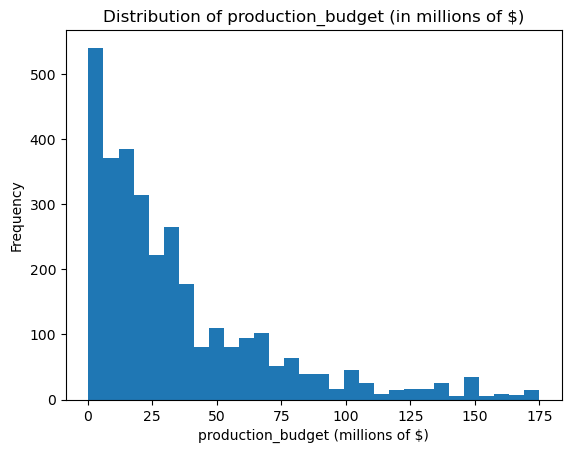

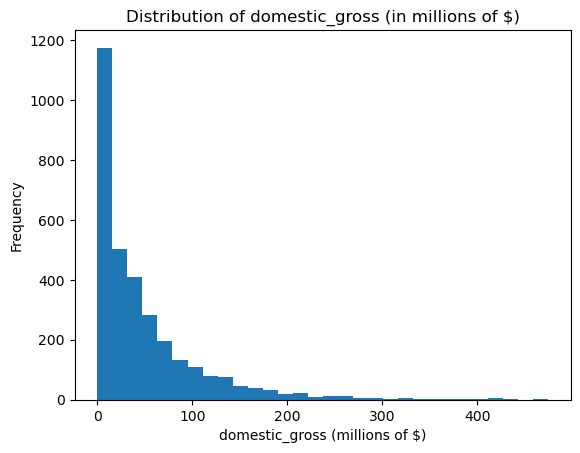

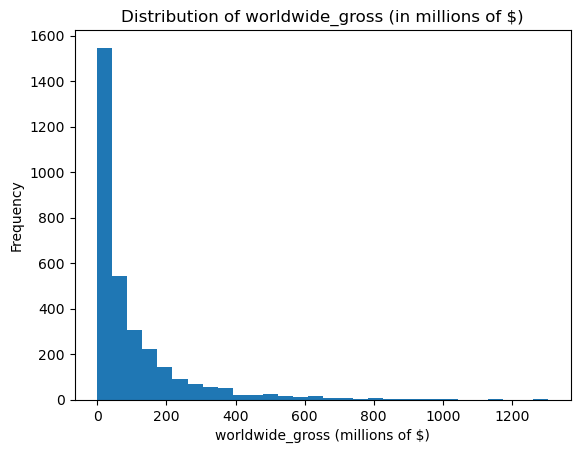

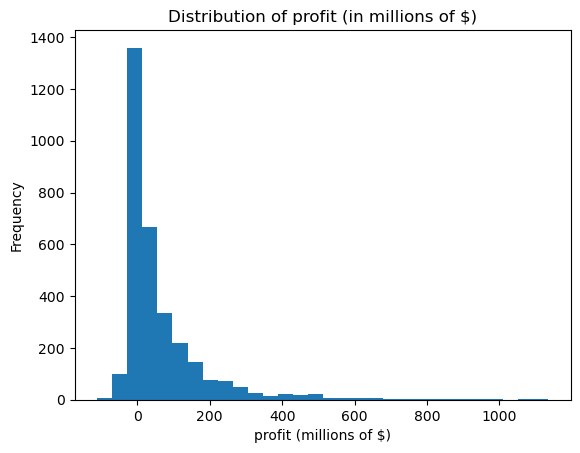

In [131]:
# List of numeric columns we want to plot
numeric_cols = ['production_budget','domestic_gross','worldwide_gross','profit']

for col in numeric_cols:
    # Avoid errors if the column we want to plot is missing
    if col in data.columns:
        # Create a new figure for each histogram
        plt.figure()
        
        # Divide by 1e6 to express values in millions, drops missing values, makes it a histogram with 30 bars
        (data[col] / 1e6).dropna().plot(kind='hist', bins=30) # Pandas version
        # plt.hist((data[col] / 1e6).dropna(), bins=30) The Matplotlib equivalent
        
        plt.title(f'Distribution of {col} (in millions of $)')
        plt.xlabel(f"{col} (millions of $)")
        plt.ylabel('Frequency')
        plt.show()

About plt.figure()

- plt.figure() isn’t really needed here because plt.show() is called inside the loop, which renders and clears each plot automatically.

- Without plt.show() in the loop, histograms would stack on the same figure unless plt.figure() was used.

- Keeping plt.figure() is good practice if the code is later changed to save or display multiple figures at once.

- plt.figure() is a Matplotlib function that creates a new, empty figure object — like opening a blank canvas before drawing.

Pandas .plot(kind="hist") vs. Matplotlib plt.hist()

Pandas .plot(kind="hist")

- Convenient when already working with DataFrames or Series

- Automatically handles NaN values

- Less flexible for customisation

- Does not return histogram data

Matplotlib plt.hist()

- More control over appearance and behaviour

- Returns counts, bin edges, and patches, which can be useful for further analysis

- Better suited for complex or presentation-quality plots (Matplotlib offers more and this integrates with it)

- Slightly more verbose (longer to write)

- Does not automatically handle NaNs

Pandas is fine for quick checks, Matplotlib is better for more control or intent to polish the plots.

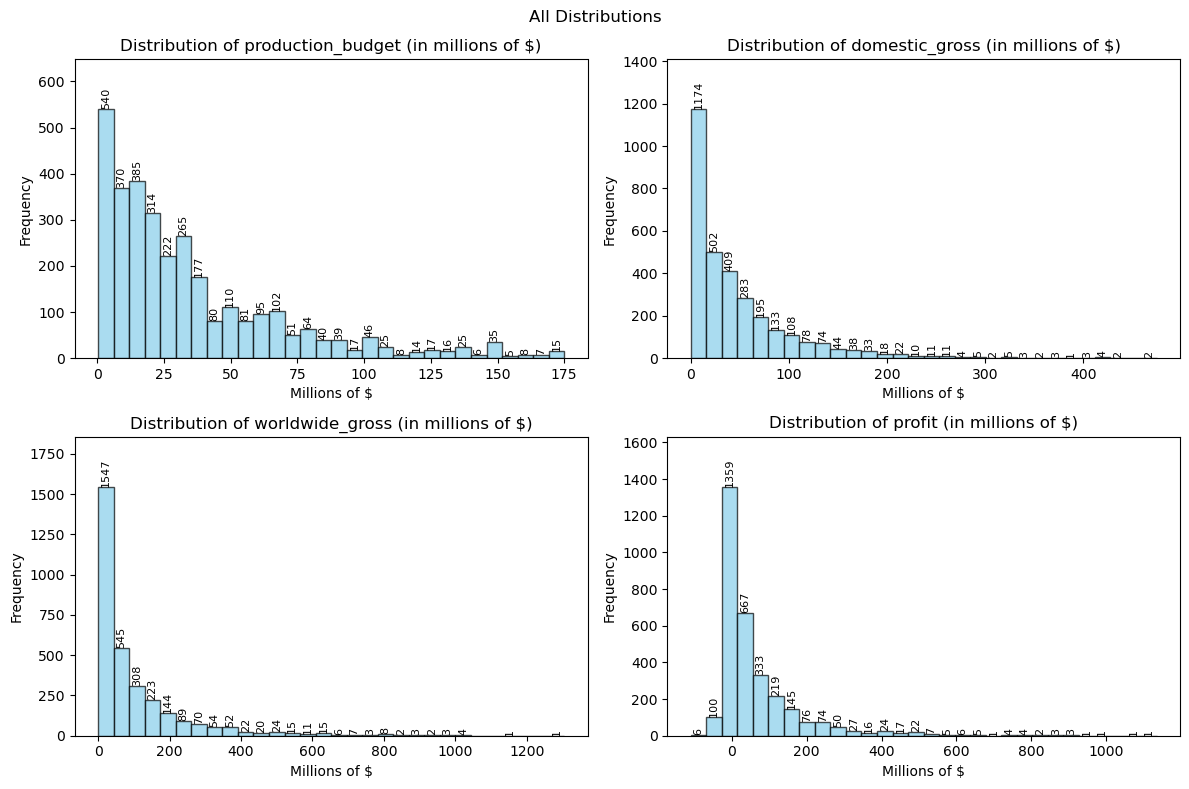

In [132]:
import matplotlib.pyplot as plt

# List of numeric columns we want to plot
numeric_cols = ['production_budget', 'domestic_gross', 'worldwide_gross', 'profit']

# Create a 2x2 grid of subplots (adjust size as needed)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("All Distributions")

# A single axes is a single plotting area, this variable is the plural which is also axes
# Here we flatten axes array for easy looping
# this is all 4 as a 2x2 (2, 2) numPy array flattened into a 1d array (4,)
axes = axes.ravel()

# Loop through each column and corresponding subplot axis.
# zip bascially zippers 2 lists so so you get 1a, 2b, 3c
for ax, col in zip(axes, numeric_cols):
    if col in data.columns:
        # Prepare values: scale to millions, drop missing
        values = (data[col] / 1e6).dropna()
        
        # Create histogram using Matplotlib
        # Note that alpha is about the bars transparency
        # Count is the value of each bar
        # patches are the actual bars which are individual objects
        counts, bins, patches = ax.hist(values, bins=30, color="skyblue", edgecolor="black", alpha=0.7)
        
        # Annotate bars with counts
        # Since bins are an array of boundaries.For 50 bins there are 51 boundaries so we need to get rid of the last one
        # So we have the left edge of every bin (x) which pairs with each count
        for count, x in zip(counts, bins[:-1]):
            if count > 0:  # only label non-empty bins
                # (bins[1] - bins[0]) / 2    |   Is for getting the middle of the bin (width/2)
                # 1 and 0 are hardcoded since all bars are the same width so to get the middle you add the same distance from the left edge (x)
                ax.text(x + (bins[1] - bins[0]) / 2, count, str(int(count)),
                        ha='center', va='bottom', fontsize=8, rotation=90)
        
        # Set titles and labels
        ax.set_title(f"Distribution of {col} (in millions of $)")
        ax.set_xlabel("Millions of $")
        ax.set_ylabel("Frequency")
        ax.set_ylim(top=max(counts) * 1.2) # extra headroom for the text ontop of the bars

# Adjust layout so titles/labels don’t overlap
plt.tight_layout()
plt.show()


### plt.hist vs ax.hist

#### plt
- plt (Matplotlib state-based interface).
- You issue commands (plt.hist, plt.title, etc.), and Matplotlib applies them to the “current” figure/axes.
- (uses the current active Axes (set implicitly by Matplotlib))

#### ax
- ax (object-oriented interface). ax is an Axes object, usually created with plt.subplots().
- When you call ax.hist(...), you explicitly say “draw this histogram on this specific subplot.”
- (uses the Axes object you explicitly reference)
- For multiple subplots or complex figures where you have more control over where exactly things are drawn

## Findings

#### Data Quality
- Looked at numeric financial columns only; production_budget, domestic_gross, worldwide_gross, and profit.  
- Values converted into millions of dollars for easier reading.  
- Dropped missing values before plotting – plots are only based on complete rows.  


#### Patterns
- Production budgets are very right-skewed; most films cost under $25M, a few go beyond $150M.  
- Domestic grosses are also skewed; the majority earn less than $50M, only a few make $200M+.  
- Worldwide grosses show an even sharper skew – most under $100M, but a few reach the billion-plus range.  
- Profits follow the same story; lots of modest returns (and losses) with just a few having much greater success.  
- Overall; the charts highlight a blockbuster economy – a small number of massive films dominate while most remain modest.  


#### Limitations
- ROI isn’t directly shown; raw profit doesn’t tell the full story (a $500M profit means very different things if the budget was $10M vs $300M) - this is a limitation of histograms that can be compensated for in scatter graphs.  
- Heavy skew in all variables lead to averages being poorly representive of what is typical of a film – medians or log scales would show a clearer picture.  
- Inflation and time not accounted for.

### Budget vs Worldwide Gross

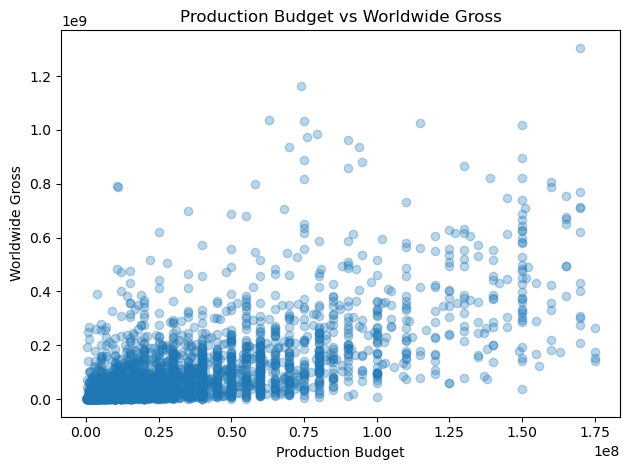

In [133]:
if all(col in data.columns for col in ['production_budget','worldwide_gross']):
    x = data['production_budget']
    y = data['worldwide_gross']
    plt.figure()
    plt.scatter(x, y, alpha=0.3)
    plt.title('Production Budget vs Worldwide Gross')
    plt.xlabel('Production Budget')
    plt.ylabel('Worldwide Gross')
    plt.tight_layout()
    plt.show()


## Findings

#### Data Quality
- Focus here is only on two numeric columns; production_budget and worldwide_gross.  
- Missing values and zero entries were dropped before plotting – only complete cases are shown.  
- Transparency (alpha) was used to deal with overlapping points to make density clearer.  


#### Key Patterns
- Positive relationship; higher budgets tend to link with higher worldwide grosses.  
- Relationship isn’t linear – spending more doesn’t guarantee proportionally higher returns.  
- Many low-budget films earn very little worldwide; only a small number break out but are capable of competing with more expensive films.   


#### Limitations
- Correlation doesn’t mean causation; a high budget and high gross may both be driven by other factors (franchise strength, distribution scale, marketing).
- Lack of information on what the production budget contains. Animation can have different expenses to live action
- Overplotting at the low end; many movies cluster near zero, so patterns among smaller films are harder to see.  
- No ROI shown here – a $200M budget film making $300M looks like a success on this chart, but its return margin may be modest compared to a \$5M indie making \$50M.  
- Inflation and time trends not accounted for – a “big” budget in the 1980s vs 2010s are not equal.  


### Mean domestic gross by MPAA rating

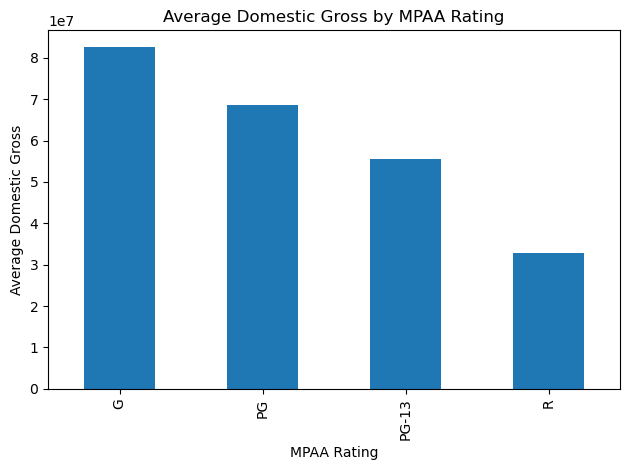

In [134]:
if 'mpaa_rating' in data.columns and 'domestic_gross' in data.columns:
    # Group the dataset by MPAA rating
    # From each group, only keep the domestic_gross column - what we are summarising
    # Calculate the mean domestic gross for each rating - instead of showing the dross for every movie of each category
    mean_by_rating = data.groupby('mpaa_rating')['domestic_gross'].mean()
    plt.figure()
    mean_by_rating.plot(kind='bar')
    plt.title('Average Domestic Gross by MPAA Rating')
    plt.xlabel('MPAA Rating')
    plt.ylabel('Average Domestic Gross')
    plt.tight_layout()
    plt.show()


## Findings

#### Data Quality
- Uses two columns only; mpaa_rating (categorical) and domestic_gross (numeric).  
- Rows with missing values in either column were dropped before calculation.  
- Averages are based on grouped means by rating – no weighting for number of films per category.  


#### Key Patterns
- G-rated films show the highest average domestic gross; over $80M.  
- PG films follow closely behind at around $70M.  
- PG-13 films are lower still, averaging about $55M.  
- R-rated films earn the least on average; roughly $30M.  
- Suggests broader audience categories (G, PG) bring higher domestic earnings compared to more restricted categories (PG-13, R).  


#### Limitations
- Small sample sizes in certain categories can skew results - a small category’s average might be dominated by a few outliers.  
- Only averages shown; doesn’t capture spread or variation within categories.  
- Averages don’t consider number of releases; PG-13 films are far more common than G, so comparing raw averages can be misleading.  
- Domestic grosses only; worldwide performance might show different trends.  


### Correlation heatmap

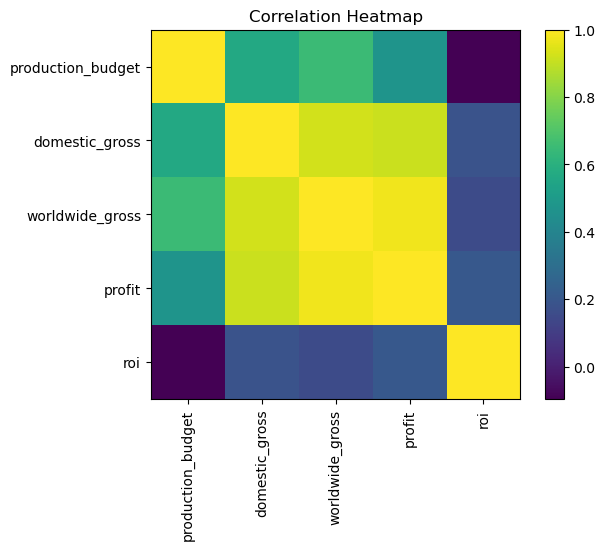

In [135]:
# Making a new DF that only contains the numeric colums
num_df = data.select_dtypes(include='number')
# Check if colums (1 is colums, 0 is rows) is >= 2, the amount needed to make a heatmap
if num_df.shape[1] >= 2:
    corr = num_df.corr(numeric_only=True)
    plt.figure()
    plt.imshow(corr)
    # list of ticks you want, the label and then the orientation
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.title('Correlation Heatmap')
    plt.colorbar()
    plt.show()
else:
    print('Not enough numeric columns for a correlation heatmap')


## Findings

#### Data Quality
- Restricted to numeric columns only; production_budget, domestic_gross, worldwide_gross, profit, and roi.  
- Rows with missing values were dropped before calculation.  
- Pearson correlation used – measures linear relationships between pairs of variables.  

#### Key Patterns
- Strong positive correlations between domestic_gross, worldwide_gross, and profit; makes sense as these measures scale together.  
- Production budgets are positively correlated with grosses and profit; bigger spending usually ties to bigger earnings.  
- ROI (return on investment) shows weak or negative correlation with budget and grosses – spending more doesn’t guarantee efficiency.  
- ROI is almost uncorrelated with the other measures, highlighting that profitability ratios behave differently from raw totals.  


#### Limitations
- Correlation only captures linear relationships; non-linear effects such as diminishing returns at very high budgets, aren’t shown  
- ROI can be noisy; a few extreme values can reduce the strength of visible correlations.  
- No causality implied; higher budgets and grosses may both be driven by third factors like marketing, distribution reach, or franchise status.  

## Final thoughts

Most films in the dataset seit at the modest end of the scale; it's only a handful of blockbusters that really dominate grosses and profits. Ratings are seen to have an influence on earnings, and budgets tend to track with grosses but not in a clean or efficient way. ROI best demonstrates this - throwing more money at a film doesn't guarantee bigger returns. Overall, the results give a fair overview of the dataset and point out how averages and correlations can be misleading when data is this skewed. There are many more correlations I could have taken time to discover and present but I am happy with this example of Exploratory Data Analysis